# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html


## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [1]:
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")

 Crear un dataframe con los 10 años que más precipitiaciones han tenido:

In [2]:
head(weatherPraga[order(weatherPraga$PRCP,decreasing = T),c("DATE","PRCP")],10)

,DATE,PRCP
165,1939,745.5
54,1828,665.4
228,2002,661.5
172,1946,638.3
116,1890,637.3
63,1837,634.9
184,1958,633.1
57,1831,625.7
192,1966,624.1
55,1829,622.4


* Pinta en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Además crear una regresión lineal (polinomio orden 1) que muestre la tendencia.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)

[1] "La temperatura mínima ha subido  0.0173750305134395 ºC/año"


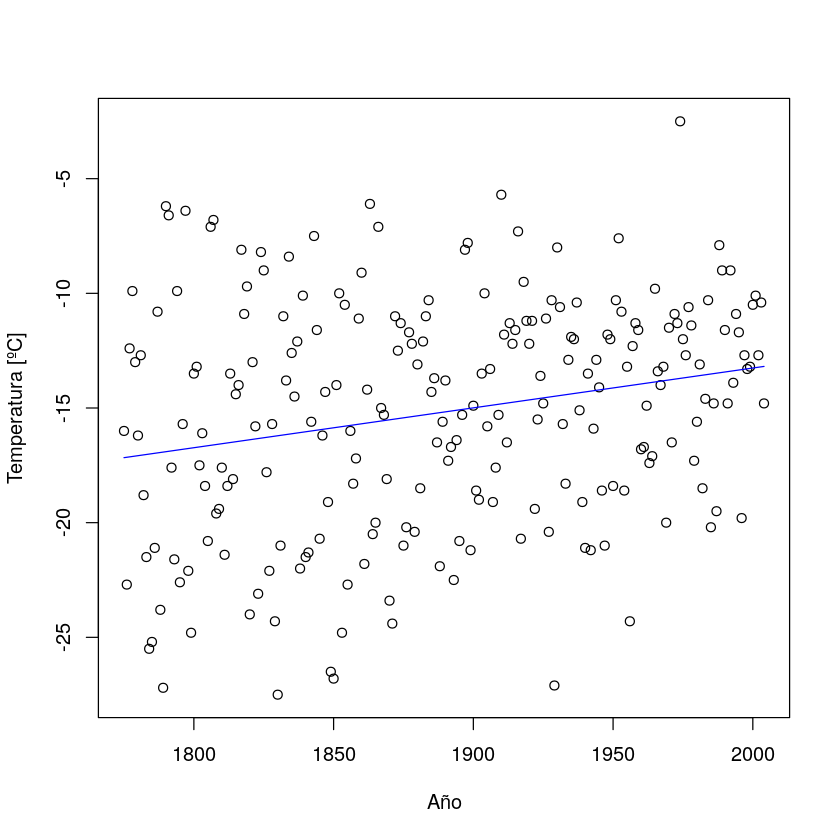

In [3]:
plot(weatherPraga$DATE,weatherPraga$EMNT,xlab = "Año",ylab = "Temperatura [ºC]")

model<-lm(data = weatherPraga, EMNT~DATE)
lines(weatherPraga$DATE,predict(model,weatherPraga),col="blue")

print(paste("La temperatura mínima ha subido ",model$coefficients[2],"ºC/año"))

¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [4]:
tmin1<-weatherPraga[weatherPraga$DATE %in% seq(1775,1794),"EMNT"]
tmin2<-weatherPraga[weatherPraga$DATE %in% seq(1985,2004),"EMNT"]

print(paste("La temperatura mínima media en el intervalo [1775,1794] es:",mean(tmin1),"ºC"))
print(paste("La temperatura mínima media en el intervalo [1985,2004] es:",mean(tmin2),"ºC"))
print(paste("La diferencia entre ambos es:",mean(tmin1)-mean(tmin2),"ºC"))


sp1<-shapiro.test(tmin1)
sp2<-shapiro.test(tmin2)

print(paste("Aplicamos shapiro test en las temperaturas. El pvalor en un las dos secuencias es",
            sp1$p.value,"y",sp2$p.value,". Ambos son valores muy altos, así que asumimos normalidad."))
print("Como las dos secuencias de datos son gausianas podemos aplicar un test de Welch.")

tt<-t.test(tmin1,tmin2)

print(paste("Su p-valor es de",tt$p.value,"<0.05."))
print("Así que podemos descartar la hipótesis nula y decir que la diferencia es estadísticamente significativa.")



[1] "La temperatura mínima media en el intervalo [1775,1794] es: -16.935 ºC"
[1] "La temperatura mínima media en el intervalo [1985,2004] es: -13.04 ºC"
[1] "La diferencia entre ambos es: -3.895 ºC"
[1] "Aplicamos shapiro test en las temperaturas. El pvalor en un las dos secuencias es 0.380826132704572 y 0.0751036246207044 . Ambos son valores muy altos, así que asumimos normalidad."
[1] "Como las dos secuencias de datos son gausianas podemos aplicar un test de Welch."
[1] "Su p-valor es de 0.0257068429001728 <0.05."
[1] "Así que podemos descartar la hipótesis nula y decir que la diferencia es estadísticamente significativa."


## Datos banco mundial

Carga los datos del banco mundial

In [5]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"
[1] "Tenemos un total de 80 indicadores"


¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970?
¿Cuanto contaminó?,

**Ayuda:**
Filtrar por:
1. columna databank\$Indicator.Code=="EN.ATM.GHGT.KT.CE"

1. columna databank\$Country.Code que esté dentro de realCountryData\$Country.Code

1. quédate con las columnas "Country.Name" y "1970" del subset de databank

In [6]:
co2eq1970<-subset(databank,
                  Indicator.Code=="EN.ATM.GHGT.KT.CE" & Country.Code 
                  %in% realCountryData$Country.Code)[,c("Country.Name","1970")]

print(paste("El país que más toneladas equivalentes de CO2 emitió en 1970 fue:",
            co2eq1970[which.max(co2eq1970$"1970"),"Country.Name"]))

print(paste("Emitió: ",max(co2eq1970$"1970",na.rm=T),"kt de CO2"))

[1] "El país que más toneladas equivalentes de CO2 emitió en 1970 fue: United States"
[1] "Emitió:  5400503.5 kt de CO2"


¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

**Ayuda:**
Filtrar por:
1. columna databank\$Indicator.Code=="EN.ATM.GHGT.KT.CE"

1. columna databank\$Country.Code que esté dentro de realCountryData\$Country.Code

1. quédate con las columnas "Country.Name" y "2012" del subset de databank

In [7]:
co2eq2012<-subset(databank,Indicator.Code=="EN.ATM.GHGT.KT.CE" & 
                  databank$Country.Code %in% realCountryData$Country.Code)[,c("Country.Name","2012")]
co2eq2012<-na.omit(co2eq2012)

head(co2eq2012[order(co2eq2012$"2012",decreasing = T),],5)


,Country.Name,2012
3079,China,12454711
19959,United States,6343841
8599,India,3002895
2199,Brazil,2989418
16039,Russian Federation,2803398


Compara las emisiones de CO2(kt) per cápita (clave EN.ATM.CO2E.PC) de todos los paises en 1960,1990 y 2017 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

No id variables; using all as measure variables


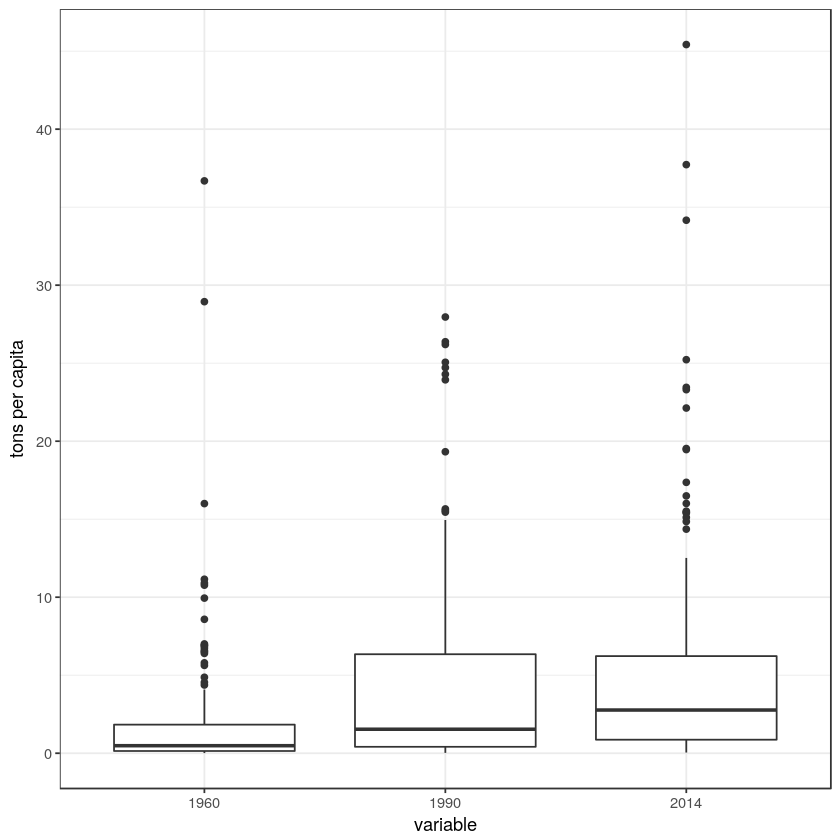

In [8]:
library(ggplot2)
library(reshape2)
coe2kt<-subset(databank,Indicator.Code=="EN.ATM.CO2E.PC" & 
               databank$Country.Code %in% realCountryData$Country.Code)

tmpdf<-melt(coe2kt[,c("1960","1990","2014")])
ggplot(tmpdf,aes(y=value,x=variable))+geom_boxplot(na.rm=T)+theme_bw()+ylab("tons per capita")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


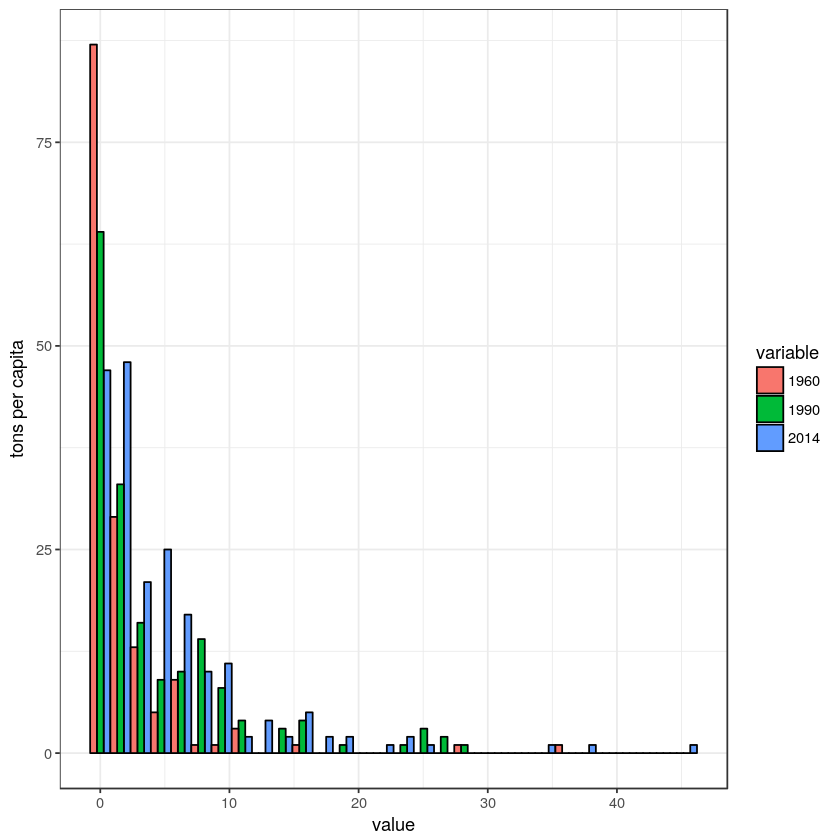

In [9]:
ggplot(tmpdf,aes(x=value,fill=variable))+geom_histogram(na.rm=T,position = "dodge",color="black")+
    theme_bw()+ylab("tons per capita")

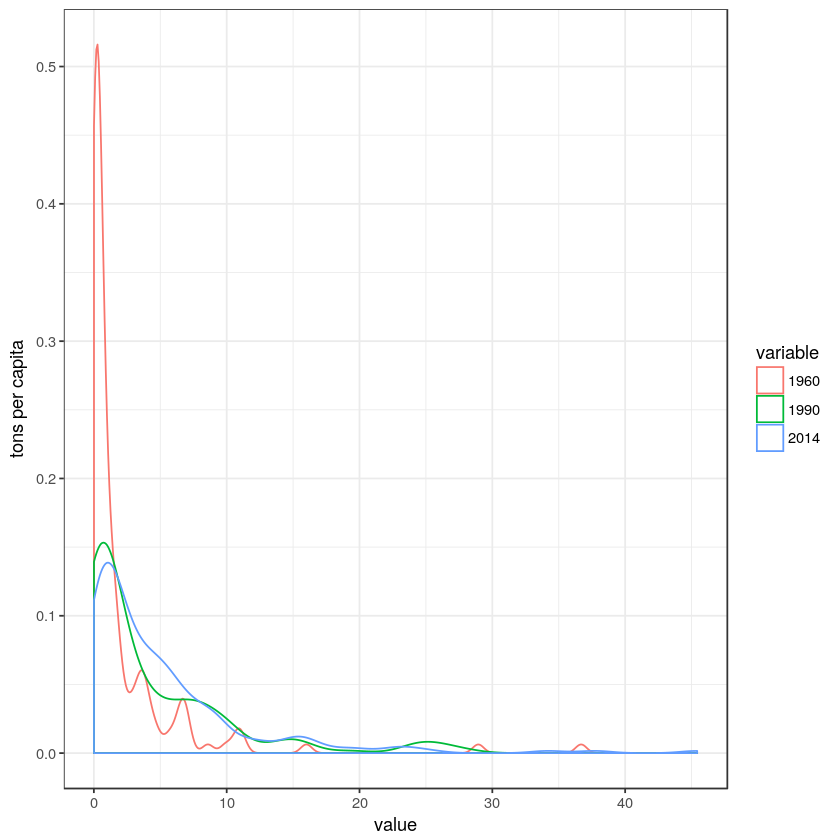

In [10]:
ggplot(tmpdf,aes(x=value,color=variable))+geom_density(na.rm=T)+
    theme_bw()+ylab("tons per capita")

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2(kt) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

Using Country.Code as id variables


Country,Year,value
EUU,1960,2359594.9
NAC,1960,3083749.0
SSA,1960,126081.5
TEA,1960,840235.7
WLD,1960,9396705.8
EUU,1961,2445945.7


Warning message:
“Removed 15 rows containing missing values (geom_path).”

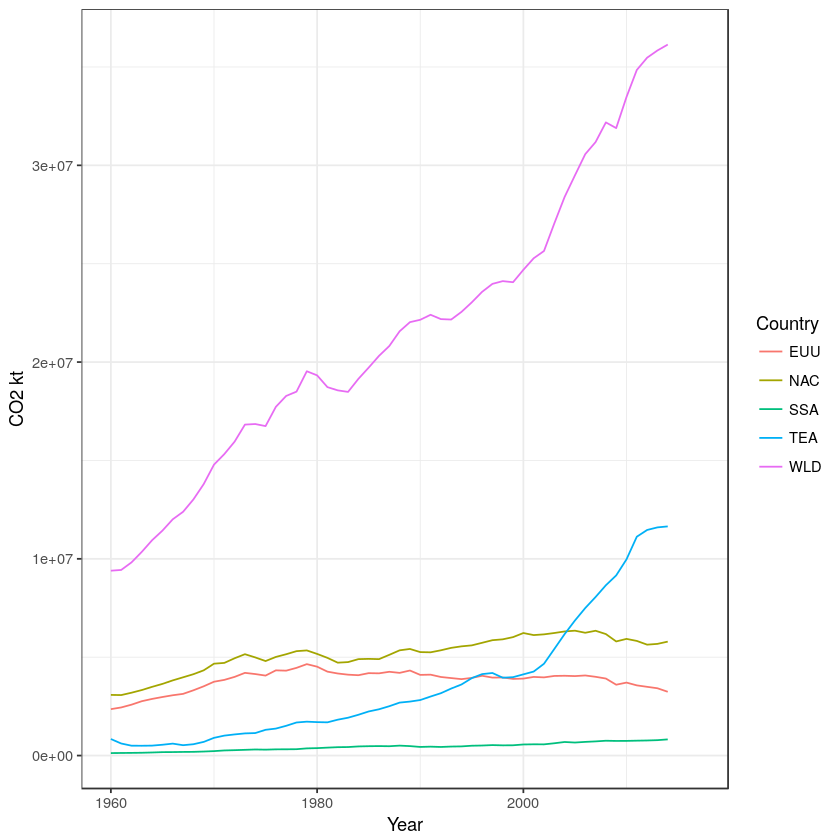

In [11]:
library(reshape2)
library(ggplot2)
country_codes<-c("WLD","EUU","SSA","NAC","TEA")
rd<-subset(regionData[country_codes,c("Country.Code","TableName","SpecialNotes")])

# Emisiones de CO2 (kt)
coe2kt<-subset(databank,Indicator.Code=="EN.ATM.CO2E.KT" & databank$Country.Code %in% rd$Country.Code) 
yearCols<-5:(ncol(databank)-1)
coe2kt<-coe2kt[,c(2,yearCols)]
coe2kt<-melt(coe2kt)

coe2kt[,"variable"]<-as.numeric(as.character(coe2kt[,"variable"]))
names(coe2kt)<-c("Country","Year","value")
head(coe2kt)

ggplot(data=coe2kt,aes(x=Year,y=value,color=Country))+geom_line()+theme_bw()+ylab("CO2 kt")


Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los modelos

,Country,Year,value
5,WLD,1960,9396706
10,WLD,1961,9434403
15,WLD,1962,9818840
20,WLD,1963,10355747
25,WLD,1964,10947007
30,WLD,1965,11433442


1 
36077323

1 
45926324

1 
87325918

Warning message:
“Removed 3 rows containing missing values (geom_path).”

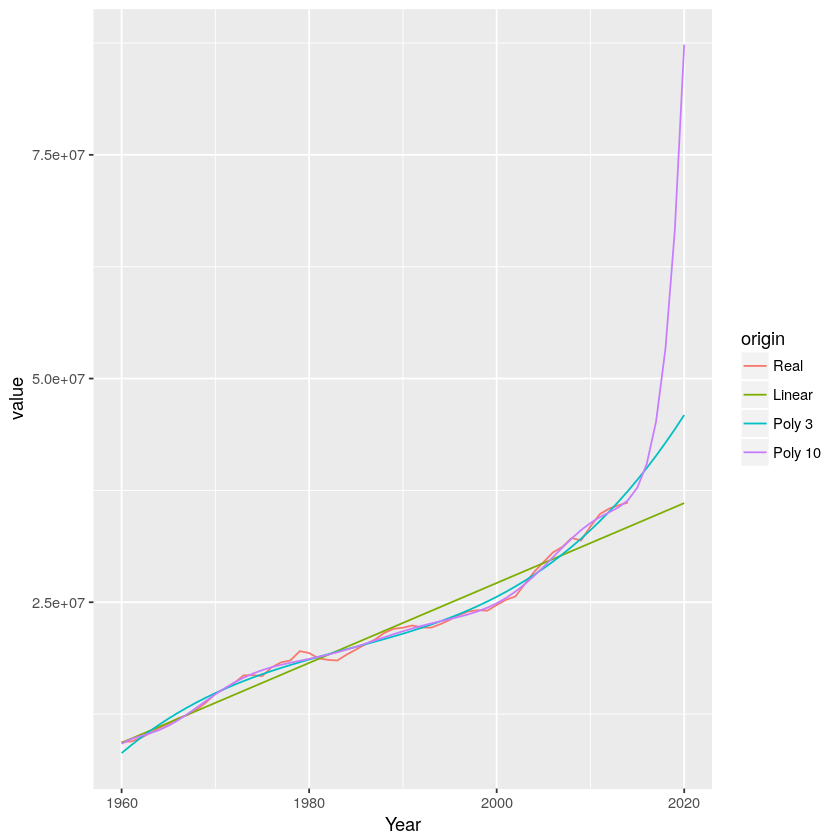

In [12]:
coe2ktwld<-subset(coe2kt,Country=="WLD")
head(coe2ktwld)
model1<-lm(data=coe2ktwld,formula=value~Year)
predict(model1,data.frame(Year=2020))

model3<-lm(data=coe2ktwld,formula=value~poly(Year,3))
predict(model3,data.frame(Year=2020))

model10<-lm(data=coe2ktwld,formula=value~poly(Year,10))
predict(model10,data.frame(Year=2020))

coe2ktwldpred<-data.frame(origin="Real",Year=coe2ktwld$Year,value=coe2ktwld$value)

years<-1960:2020
coe2ktwldpred<-rbind(coe2ktwldpred,data.frame(origin="Linear",Year=years,value=predict(model1,data.frame(Year=years))))
coe2ktwldpred<-rbind(coe2ktwldpred,data.frame(origin="Poly 3",Year=years,value=predict(model3,data.frame(Year=years))))
coe2ktwldpred<-rbind(coe2ktwldpred,data.frame(origin="Poly 10",Year=years,value=predict(model10,data.frame(Year=years))))

ggplot(data=coe2ktwldpred,aes(x=Year,y=value,color=origin))+geom_line()


## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [13]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))

Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank

No id variables; using all as measure variables


[1] "La correlación entre le CO2 emitido y el existente en la atmósfera es de:"

[1] 0.9845578

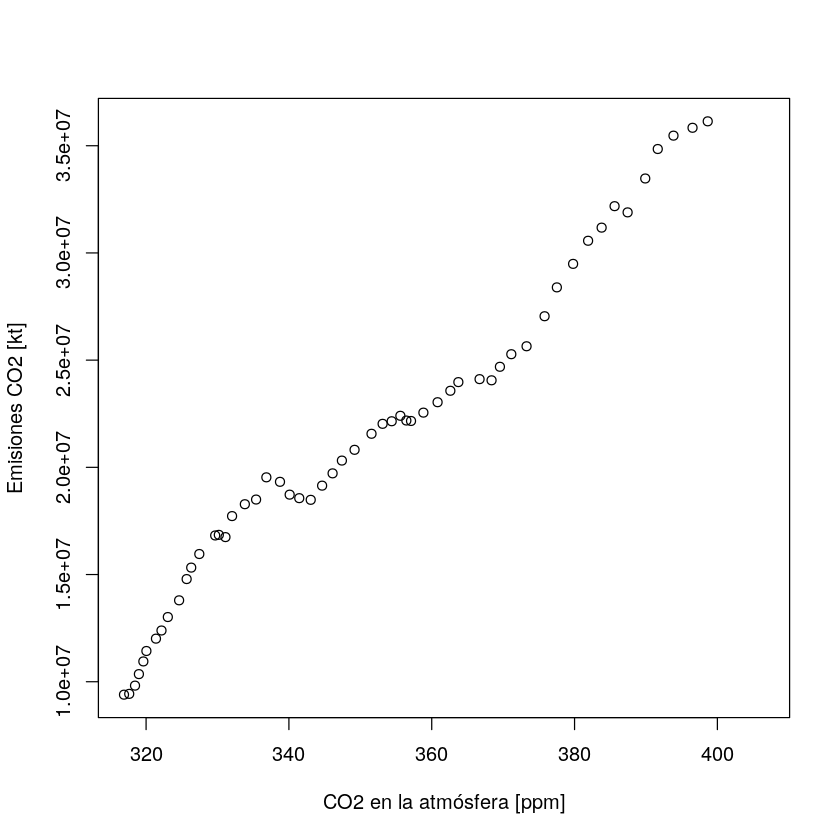

In [14]:
# Agregamos y calculamos el nivel de CO2 medio anual
yearlyco2ppm<-aggregate(interpolated ~ year, data = co2ppm, mean)
names(yearlyco2ppm)<-c("year","co2.atm")

# Preparamos los datos de databank
coe2ktwld<-subset(databank,Indicator.Code=="EN.ATM.CO2E.KT" & databank$Country.Code=="WLD") 
yearCols<-5:(ncol(databank)-1)
coe2ktwld<-coe2ktwld[,c(yearCols)]
coe2ktwld<-melt(coe2ktwld)
names(coe2ktwld)<-c("year","co2.emission")

#Unimos todo en un único dataframe
co2tot<-merge(yearlyco2ppm,coe2ktwld,by="year")

plot(co2tot$co2.atm,co2tot$co2.emission,xlab = "CO2 en la atmósfera [ppm]",ylab="Emisiones CO2 [kt]")

paste("La correlación entre le CO2 emitido y el existente en la atmósfera es de:")
cor(co2tot$co2.atm,co2tot$co2.emission,use="complete.obs")

In [15]:

str(coe2ktwld)

'data.frame':	58 obs. of  2 variables:
 $ year        : Factor w/ 58 levels "1960","1961",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ co2.emission: num  9396706 9434403 9818840 10355747 10947007 ...


In [16]:
co2tot<-merge(yearlyco2ppm,coe2ktwld,by="year")
head(co2tot)

year,co2.atm,co2.emission
1960,316.9075,9396706
1961,317.6375,9434403
1962,318.4508,9818840
1963,318.9942,10355747
1964,319.6175,10947007
1965,320.0442,11433442


#### Notas

Datos originales: https://datos.bancomundial.org/tema/cambio-climatico

Paquetes weather:

install.packages('rgeos', type="source")

install.packages('rgdal', type="source")

apt-get install libgdal-dev

install.packages("GSODR")



Datos sobre hielo:
https://blueice.gsfc.nasa.gov/seaice_datasets.html



Varios datos:
https://tamino.wordpress.com/climate-data-links/

In [17]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
head(databank,3)

Country.Name,Country.Code,Indicator.Name,Indicator.Code,X1960,X1961,X1962,X1963,X1964,X1965,⋯,X2009,X2010,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X
Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,5.073000e+01,5.071500e+01,5.070000e+01,⋯,43.4210000,43.0590000,42.6980000,42.3640000,42.0580000,4.17790e+01,4.1528e+01,4.130400e+01,NA,NA
Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,2.876100e+04,2.892400e+04,2.908200e+04,⋯,44052.0000000,43778.0000000,43575.0000000,43456.0000000,43398.0000000,4.33650e+04,4.3331e+04,4.329600e+04,NA,NA
Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,7.994038e-01,5.651398e-01,5.447726e-01,⋯,-0.7305493,-0.6239346,-0.4647817,-0.2734659,-0.1335575,-7.60693e-02,-7.8435e-02,-8.080622e-02,NA,NA


In [18]:
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))
head(databank,2)

Country.Name,Country.Code,Indicator.Name,Indicator.Code,1960,1961,1962,1963,1964,1965,⋯,2009,2010,2011,2012,2013,2014,2015,2016,2017,
Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776,50.761,50.746,50.73,50.715,50.7,⋯,43.421,43.059,42.698,42.364,42.058,41.779,41.528,41.304,NA,NA
Aruba,ABW,Urban population,SP.URB.TOTL,27526.000,28141.000,28532.000,28761.00,28924.000,29082.0,⋯,44052.000,43778.000,43575.000,43456.000,43398.000,43365.000,43331.000,43296.000,NA,NA


In [19]:
countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"


In [20]:
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 80 indicadores"


In [21]:
interest_indicator_code<-c("SP.URB.TOTL","SP.POP.TOTL","SI.POV.DDAY","SH.STA.MALN.ZS","SH.STA.ACSN","SH.MED.CMHW.P3",
                          "SH.H2O.SAFE.ZS","SH.DYN.MORT","NV.AGR.TOTL.ZS","IC.BUS.EASE.XQ","ER.H2O.FWTL.ZS","EN.CLC.MDAT.ZS",
                          "EN.ATM.GHGT.KT.CE","EN.ATM.NOXE.KT.CE","EN.ATM.METH.KT.CE","EN.ATM.PFCG.KT.CE","EN.ATM.SF6G.KT.CE",
                          "EN.ATM.GHGO.KT.CE","EN.ATM.CO2E.SF.KT","EN.ATM.CO2E.LF.KT","EN.ATM.CO2E.KT","EG.USE.ELEC.KH.PC",
                          "EG.ELC.ACCS.ZS","AG.YLD.CREL.KG")

In [22]:

atm_indicators_code<-c("EN.ATM.GHGT.KT.CE","EN.ATM.NOXE.KT.CE","EN.ATM.METH.KT.CE","EN.ATM.PFCG.KT.CE","EN.ATM.SF6G.KT.CE",
                          "EN.ATM.GHGO.KT.CE","EN.ATM.CO2E.SF.KT","EN.ATM.CO2E.LF.KT","EN.ATM.CO2E.KT")
print("Los indicadores atmosféricos de interés son:")


atm_indicators<-indicators[match(atm_indicators_code,indicators$INDICATOR_CODE),c("INDICATOR_CODE","INDICATOR_NAME","SOURCE_NOTE")]
atm_indicators


[1] "Los indicadores atmosféricos de interés son:"


,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE
39,EN.ATM.GHGT.KT.CE,Total greenhouse gas emissions (kt of CO2 equivalent),"Total greenhouse gas emissions in kt of CO2 equivalent are composed of CO2 totals excluding short-cycle biomass burning (such as agricultural waste burning and Savannah burning) but including other biomass burning (such as forest fires, post-burn decay, peat fires and decay of drained peatlands), all anthropogenic CH4 sources, N2O sources and F-gases (HFCs, PFCs and SF6)."
34,EN.ATM.NOXE.KT.CE,Nitrous oxide emissions (thousand metric tons of CO2 equivalent),"Nitrous oxide emissions are emissions from agricultural biomass burning, industrial activities, and livestock management."
36,EN.ATM.METH.KT.CE,Methane emissions (kt of CO2 equivalent),Methane emissions are those stemming from human activities such as agriculture and from industrial methane production.
32,EN.ATM.PFCG.KT.CE,PFC gas emissions (thousand metric tons of CO2 equivalent),"Perfluorocarbons, used as a replacement for chlorofluorocarbons in manufacturing semiconductors, are a byproduct of aluminum smelting and uranium enrichment."
31,EN.ATM.SF6G.KT.CE,SF6 gas emissions (thousand metric tons of CO2 equivalent),Sulfur hexafluoride is used largely to insulate high-voltage electric power equipment.
41,EN.ATM.GHGO.KT.CE,"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)","Other greenhouse gas emissions are by-product emissions of hydrofluorocarbons, perfluorocarbons, and sulfur hexafluoride."
43,EN.ATM.CO2E.SF.KT,CO2 emissions from solid fuel consumption (kt),Carbon dioxide emissions from solid fuel consumption refer mainly to emissions from use of coal as an energy source.
48,EN.ATM.CO2E.LF.KT,CO2 emissions from liquid fuel consumption (kt),Carbon dioxide emissions from liquid fuel consumption refer mainly to emissions from use of petroleum-derived fuels as an energy source.
49,EN.ATM.CO2E.KT,CO2 emissions (kt),"Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring."


In [23]:
weather<-read.csv("./datos/USC00255090.csv", sep = ",")
str(weather)

'data.frame':	110 obs. of  72 variables:
 $ STATION        : Factor w/ 1 level "USC00255090": 1 1 1 1 1 1 1 1 1 1 ...
 $ DATE           : int  1894 1896 1897 1898 1900 1901 1902 1903 1905 1906 ...
 $ LATITUDE       : num  40.9 40.9 40.9 40.9 40.9 ...
 $ LONGITUDE      : num  -102 -102 -102 -102 -102 ...
 $ ELEVATION      : num  975 975 975 975 975 ...
 $ NAME           : Factor w/ 1 level "MADRID, NE US": 1 1 1 1 1 1 1 1 1 1 ...
 $ CDSD           : num  NA NA NA NA NA ...
 $ CDSD_ATTRIBUTES: logi  NA NA NA NA NA NA ...
 $ CLDD           : num  NA NA NA NA NA ...
 $ CLDD_ATTRIBUTES: int  NA NA NA NA NA 0 NA NA 0 0 ...
 $ DP01           : int  42 41 42 32 31 37 39 42 68 62 ...
 $ DP01_ATTRIBUTES: int  6 6 6 6 0 0 0 0 0 0 ...
 $ DP10           : int  26 32 35 30 26 36 33 37 55 52 ...
 $ DP10_ATTRIBUTES: int  6 6 6 6 0 0 0 0 0 0 ...
 $ DSND           : int  NA NA NA NA 0 0 0 0 1 0 ...
 $ DSND_ATTRIBUTES: logi  NA NA NA NA NA NA ...
 $ DSNW           : int  NA NA NA NA 4 13 7 10 7 15 ...
 $

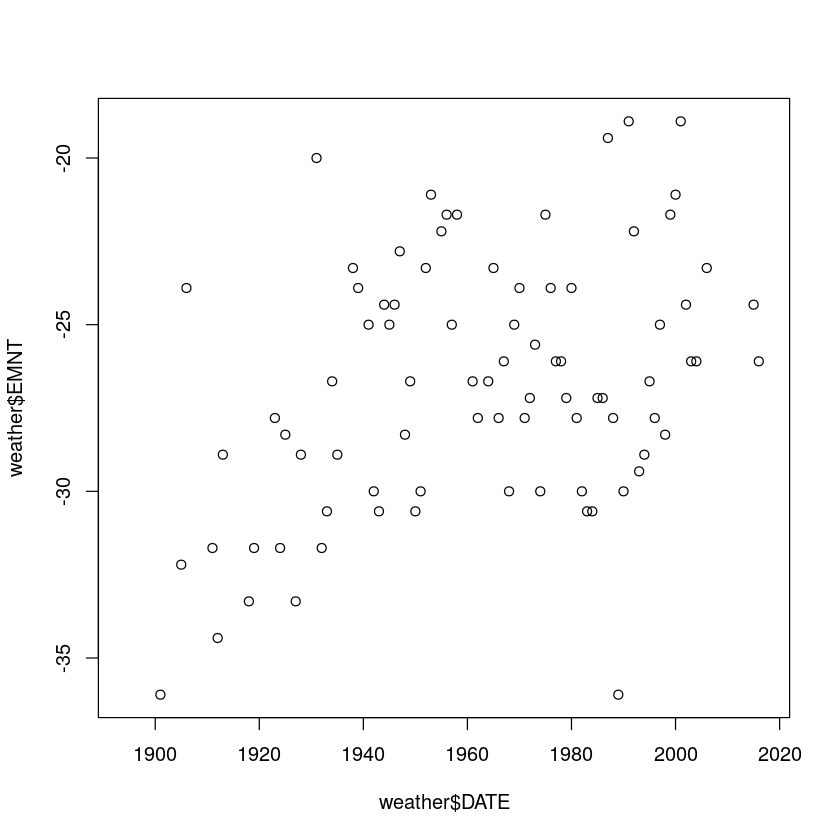

In [24]:
plot(weather$DATE,weather$EMNT)

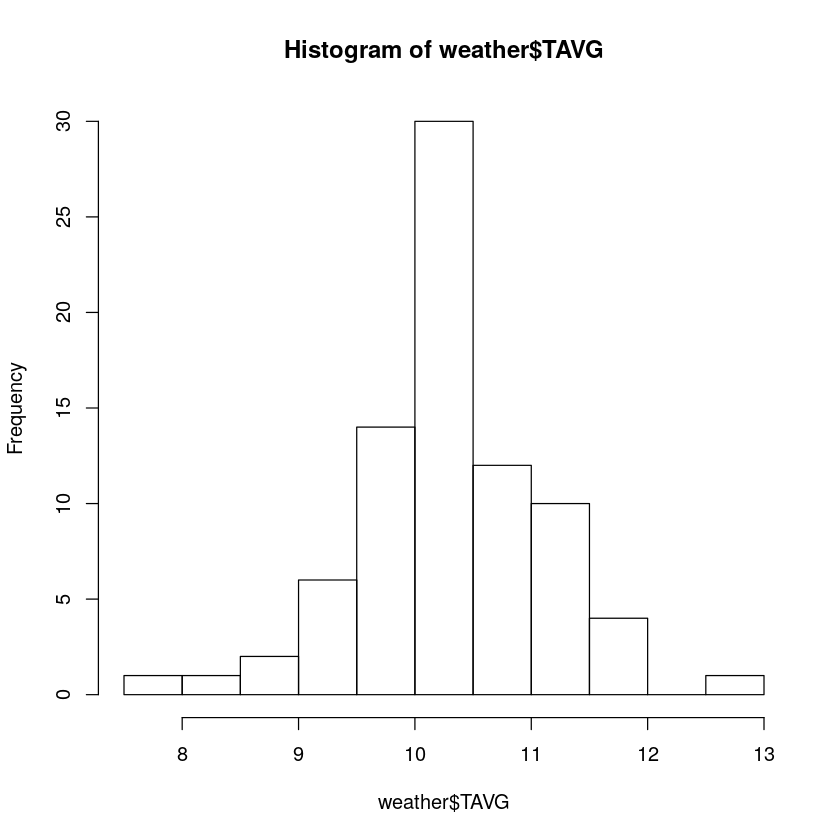

In [25]:
hist(weather$TAVG)

In [26]:
cor(weather$DATE,weather$SNOW,use="complete.obs")
cor(weather$DATE,weather$PRCP,use="complete.obs")
cor(weather$DATE,weather$TAVG,use="complete.obs")
cor(weather$DATE,weather$TMAX,use="complete.obs")
cor(weather$DATE,weather$EMXT,use="complete.obs")
cor(weather$DATE,weather$EMNT,use="complete.obs")
cor(weather$DATE,weather$TMIN,use="complete.obs")
#plot(weather$DATE,weather$PRCP)


[1] 0.1622311

[1] 0.1421681

[1] 0.2314955

[1] -0.04467221

[1] -0.09300461

[1] 0.3731925

[1] 0.4364319

In [27]:
databank[which(grepl("Cze",databank$Country.Name))[1],c("Country.Name","Country.Code")]

,Country.Name,Country.Code
4161,Czech Republic,CZE


In [28]:
yearCols<-5:(ncol(databank)-1)

In [29]:
# Emisiones de CO2 (kt)
coe2kt<-subset(databank,Indicator.Code=="EN.ATM.CO2E.KT") 

# Renewable energy consumption (% of total final energy consumption)
renewErate<-subset(databank,Indicator.Code=="EG.FEC.RNEW.ZS")

# Rendimiento de los cereales (kg por hectárea)
yieldCerealKg<-subset(databank,Indicator.Code=="AG.YLD.CREL.KG")



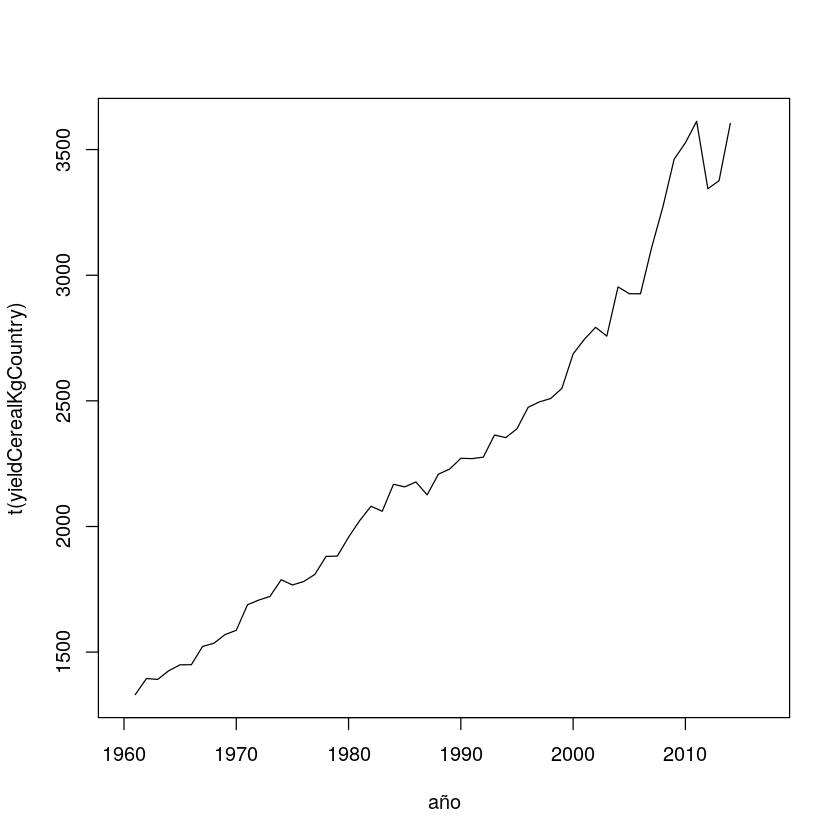

In [30]:
yieldCerealKgCountry<-yieldCerealKg[yieldCerealKg$Country.Code %in% realCountryData$Country.Code,]

yieldCerealKgCountry<-colMeans(yieldCerealKgCountry[,yearCols],na.rm=T)
plot(1960:2017,
     t(yieldCerealKgCountry),t="l",
     xlab="año")


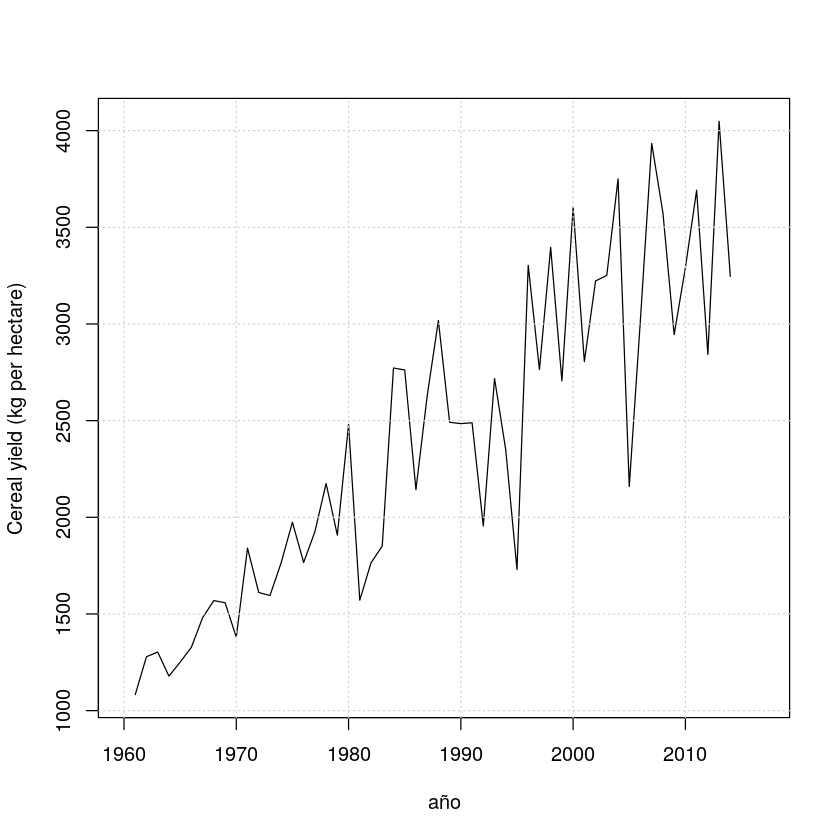

In [31]:
nc<-ncol(databank)
countryCode<-"ESP"
plot(1960:2017,
     t(subset(yieldCerealKg,Country.Code==countryCode)[,yearCols]),t="l",ylab=yieldCerealKg$Indicator.Name[1],
     xlab="año")

grid()

ERROR: Error in is.data.frame(x): object 'yieldKgSp' not found


In [ ]:
require(reshape2)

weather<-read.csv("~/Downloads/gsoy-latest/ITE00100550.csv", sep = ",")
#weather<-read.csv("~/Downloads/gsoy-latest/ITE00105250.csv", sep = ",")


yieldKgSp<-subset(databank,Indicator.Code=="AG.YLD.CREL.KG" & databank$Country.Code=="ITA") 
yearCols<-5:(ncol(databank)-1)
yieldKgSp<-yieldKgSp[,c(yearCols)]
yieldKgSp<-melt(yieldKgSp)
names(yieldKgSp)<-c("DATE","yieldCereal")
yieldKgSp$DATE<-as.numeric(as.character(yieldKgSp$DATE))
yieldKgSp<-na.omit(yieldKgSp)


model<-lm(data=yieldKgSp,yieldCereal~DATE)
residuals<-data.frame(DATE=yieldKgSp$DATE,res=model$residuals)


wc<-merge(weather[,c("DATE","PRCP","TAVG","EMNT","EMXT","TMAX","TMIN","HDSD")],residuals,by="DATE")

cor(wc$PRCP,wc$res,use="complete.obs")
cor(wc$EMXT,wc$res,use="complete.obs")
cor(wc$EMNT,wc$res,use="complete.obs")
cor(wc$TMAX,wc$res,use="complete.obs")
cor(wc$TMIN,wc$res,use="complete.obs")
cor(wc$HDSD,wc$res,use="complete.obs")

plot(wc$PRCP,wc$res,use="complete.obs")


In [ ]:


head(model$residuals)
plot(model$residuals)

#cor(wc$PRCP,model$residuals,use="complete.obs")

In [ ]:
require(reshape2)

weather<-read.csv("./datos/EZE00100082.csv", sep = ",")
yieldKgSp<-subset(databank,Indicator.Code=="AG.YLD.CREL.KG" & databank$Country.Code=="CZE") 
yearCols<-5:(ncol(databank)-1)
yieldKgSp<-yieldKgSp[,c(yearCols)]
yieldKgSp<-melt(yieldKgSp)
names(yieldKgSp)<-c("DATE","yieldCereal")

wc<-merge(weather[,c("DATE","PRCP","TAVG","EMNT","EMXT","TMAX","TMIN")],yieldKgSp,by="DATE")
cor(wc$EMNT,wc$yieldCereal,use="complete.obs")
plot(wc$EMNT,wc$yieldCereal)

In [ ]:
library("GSODR")

In [ ]:
?nearest_stations


In [ ]:
nearest_stations(40.4072043,-3.7130593,5)

In [ ]:
tbar <- get_GSOD(years = 2017, station = "082200-99999")
str(tbar)

In [33]:
#http://sealevel.colorado.edu/
seaLevel<-read.csv("./datos/sl_ns_global.txt", sep = "")

In [ ]:
str(seaLevel)

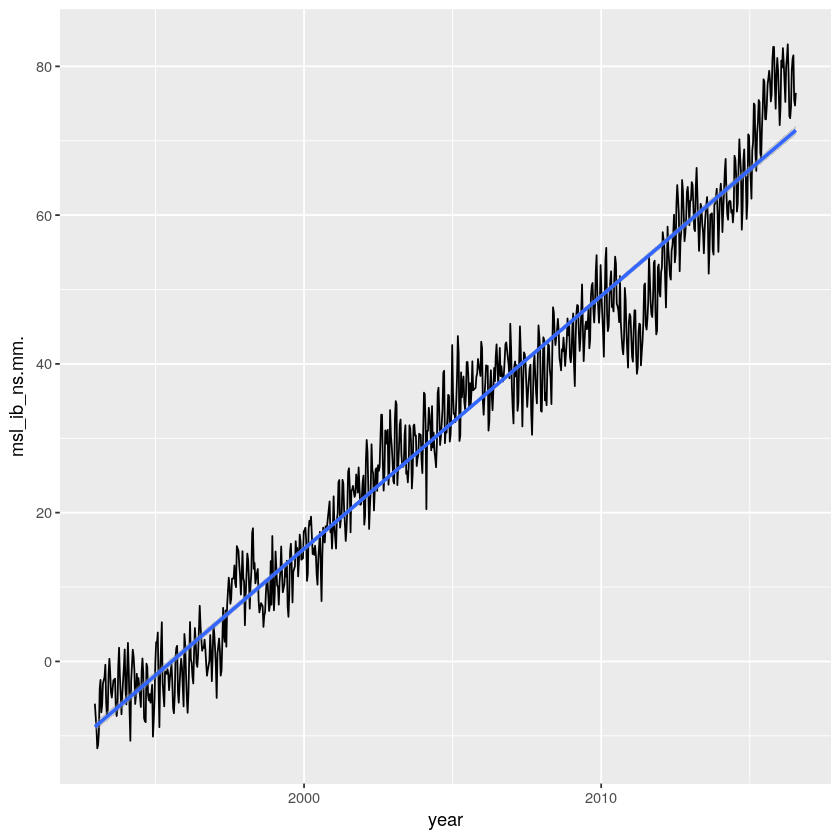

In [34]:
library(ggplot2)
ggplot(data=seaLevel,aes(x=year,y=msl_ib_ns.mm.))+geom_line()+geom_smooth(method="lm")

In [36]:
head(seaLevel$msl_ib_ns.mm.)

year,msl_ib_ns.mm.,X.version_2016_rel4
1992.959,-5.680,NA
1992.987,-7.386,NA
1993.014,-9.084,NA
1993.041,-11.682,NA
1993.068,-11.202,NA
1993.095,-9.511,NA
